In [1]:
from matplotlib import pyplot as plt
import numpy as np

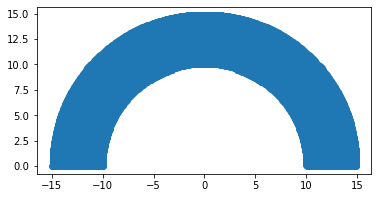

In [5]:
thk = 5
sep = 5
rad = 10
xs = []
ys = []
fig = plt.figure()
ax = fig.add_subplot(111)
for x_coord in np.arange(-(rad+thk),rad+thk,0.1):
    for y_coord in np.arange(0 ,rad+thk,0.1):
        if rad**2 <= (x_coord - 0)**2 + (y_coord - 0)**2 <= (rad+thk)**2:
            xs.append(x_coord)
            ys.append(y_coord)
ax.set_aspect('equal')
plt.scatter(xs, ys)